In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../data/merged"
fire_file_path = os.path.join(merged_dir, "fire_land_elev_soil_climate.parquet")
fire_cropped = pd.read_parquet(fire_file_path)
fire_cropped.head()

,longitude,latitude,fire,LCCCode,elevation,COARSE,SAND,CLAY,TCARBON_EQ,PH_WATER,...,tmin_iqr_summer,tmin_iqr_winter,tmax_iqr_autumn,tmax_iqr_spring,tmax_iqr_summer,tmax_iqr_winter,tmax_max,prec_min,longest_dry_period,longest_hot_period
0,9.68184,33.53246,1,0011,183,9.000000,45.333333,20.333333,9.433333,7.866667,...,1.500,0.750,5.000,4.000,1.625,1.50,40.00,0.000,1,2
1,9.27448,33.45376,1,6004,102,3.000000,37.500000,22.000000,16.250000,8.000000,...,1.500,1.500,5.250,3.875,1.500,1.50,42.00,0.000,1,3
2,8.53867,33.36744,1,6004,21,6.000000,90.000000,5.000000,0.000000,6.700000,...,1.500,1.250,5.000,4.000,2.000,2.00,44.00,0.000,2,3
3,8.35868,35.69833,1,0003 / 0004,865,19.666667,50.333333,21.333333,11.033333,7.633333,...,1.875,0.375,4.375,4.000,1.625,1.00,35.75,1.600,0,0
4,8.53032,34.93820,1,0011,752,3.000000,55.000000,18.000000,2.000000,7.500000,...,1.625,0.625,4.750,4.625,1.625,1.25,37.25,1.075,0,0


In [3]:
fire_cropped.describe()

,longitude,latitude,fire,elevation,COARSE,SAND,CLAY,TCARBON_EQ,PH_WATER,TOTAL_N,...,tmin_iqr_summer,tmin_iqr_winter,tmax_iqr_autumn,tmax_iqr_spring,tmax_iqr_summer,tmax_iqr_winter,tmax_max,prec_min,longest_dry_period,longest_hot_period
count,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,...,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000,42291.000000
mean,5.049177,34.466597,0.104419,550.219787,11.440659,50.117856,19.877127,8.742888,7.676125,0.897056,...,1.762233,1.016020,4.833709,4.140970,1.952542,1.348329,38.657250,0.706257,0.317254,1.113925
std,3.490600,1.407631,0.305807,418.433458,4.317097,11.801555,7.020769,4.348558,0.536929,0.309268,...,0.346448,0.422916,0.629092,0.584382,0.481861,0.414370,3.613636,0.413848,0.582767,1.268226
min,-2.504250,32.130630,0.000000,-31.000000,2.000000,13.000000,4.000000,0.000000,5.233333,0.260000,...,0.750000,0.000000,2.500000,2.166667,0.750000,0.000000,29.000000,0.000000,0.000000,0.000000
25%,2.208640,33.211550,0.000000,137.000000,8.333333,41.000000,15.000000,5.700000,7.450000,0.700000,...,1.500000,0.625000,4.500000,3.750000,1.500000,1.000000,36.000000,0.475000,0.000000,0.000000
50%,5.250610,34.499010,0.000000,511.000000,12.000000,50.333333,17.333333,9.833333,7.850000,0.770000,...,1.750000,1.000000,5.000000,4.250000,2.000000,1.500000,38.000000,0.700000,0.000000,0.000000
75%,7.949810,35.642740,0.000000,890.500000,14.000000,57.000000,24.500000,11.533333,8.050000,1.106667,...,2.000000,1.500000,5.250000,4.500000,2.375000,1.500000,42.000000,0.975000,1.000000,2.000000
max,11.591600,37.323460,1.000000,2154.000000,46.000000,90.000000,55.000000,26.900000,8.600000,3.440000,...,2.625000,2.000000,6.000000,5.250000,3.250000,2.000000,46.000000,2.150000,3.000000,4.000000


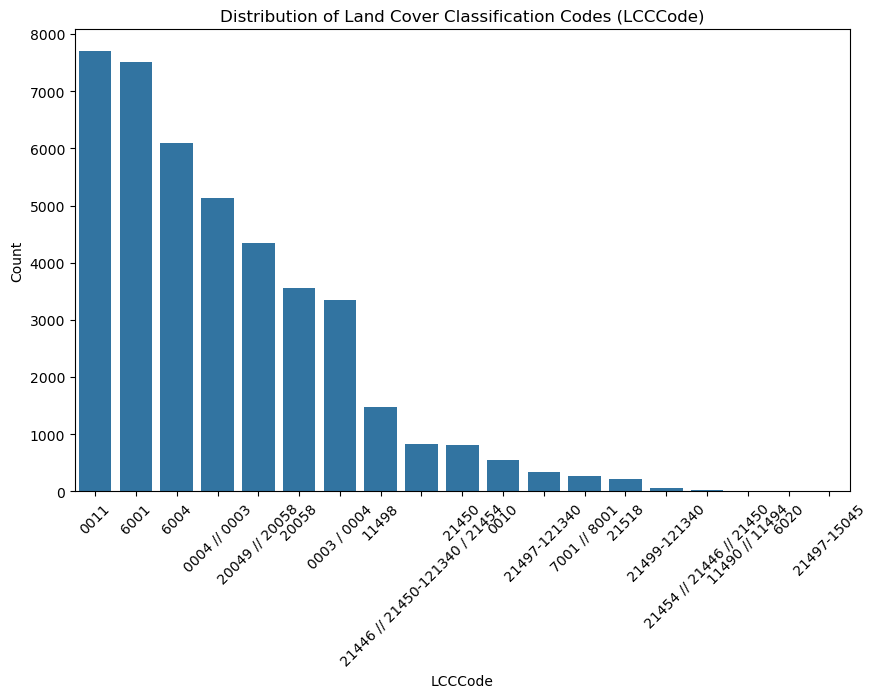

In [4]:
# plot LCCCode
plt.figure(figsize=(10,6))
sns.countplot(data=fire_cropped, x='LCCCode', order=fire_cropped['LCCCode'].value_counts().index)
plt.title('Distribution of Land Cover Classification Codes (LCCCode)')
plt.xlabel('LCCCode')
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


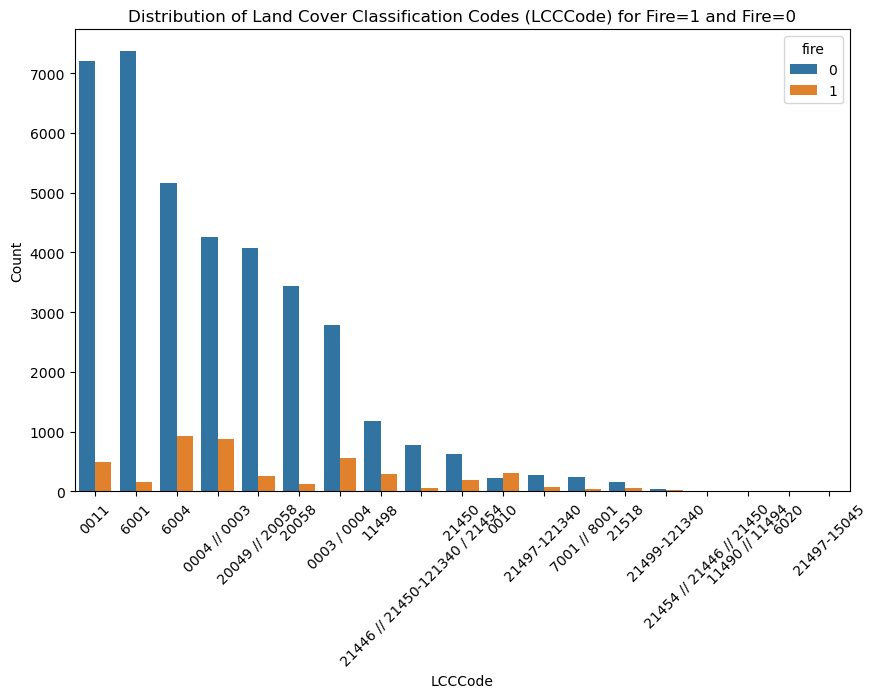

In [5]:
# plot count of fire =1 and fire =0 by LCCCode
plt.figure(figsize=(10,6))
sns.countplot(data=fire_cropped, x='LCCCode', hue='fire', order=fire_cropped['LCCCode'].value_counts().index)
plt.title('Distribution of Land Cover Classification Codes (LCCCode) for Fire=1 and Fire=0')
plt.xlabel('LCCCode')
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()



In [6]:
# unique values in LCCCode
fire_cropped['LCCCode'].nunique()

19

In [7]:
fire_cropped.columns

Index(['longitude', 'latitude', 'fire', 'LCCCode', 'elevation', 'COARSE',
       'SAND', 'CLAY', 'TCARBON_EQ', 'PH_WATER', 'TOTAL_N', 'CN_RATIO',
       'CEC_SOIL', 'ESP', 'GYPSUM', 'prec_median_autumn', 'prec_median_spring',
       'prec_median_summer', 'prec_median_winter', 'tmin_median_autumn',
       'tmin_median_spring', 'tmin_median_summer', 'tmin_median_winter',
       'tmax_median_autumn', 'tmax_median_spring', 'tmax_median_summer',
       'tmax_median_winter', 'prec_iqr_autumn', 'prec_iqr_spring',
       'prec_iqr_summer', 'prec_iqr_winter', 'tmin_iqr_autumn',
       'tmin_iqr_spring', 'tmin_iqr_summer', 'tmin_iqr_winter',
       'tmax_iqr_autumn', 'tmax_iqr_spring', 'tmax_iqr_summer',
       'tmax_iqr_winter', 'tmax_max', 'prec_min', 'longest_dry_period',
       'longest_hot_period'],
      dtype='object')

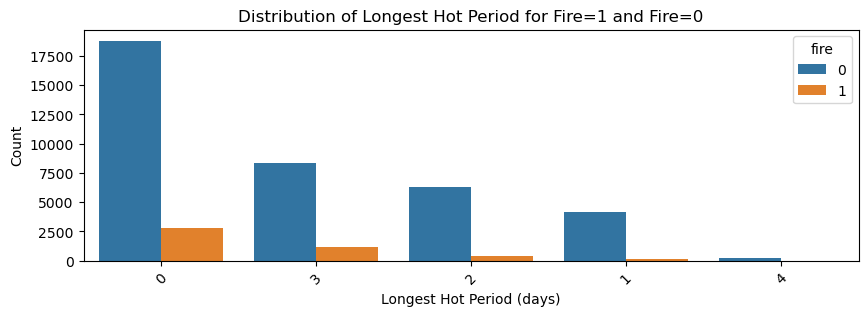

In [8]:
# fire distribution by longest_hot_period
plt.figure(figsize=(10,3))
sns.countplot(data=fire_cropped, x='longest_hot_period', hue='fire', order=fire_cropped['longest_hot_period'].value_counts().index)
plt.title('Distribution of Longest Hot Period for Fire=1 and Fire=0')
plt.xlabel('Longest Hot Period (days)')
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

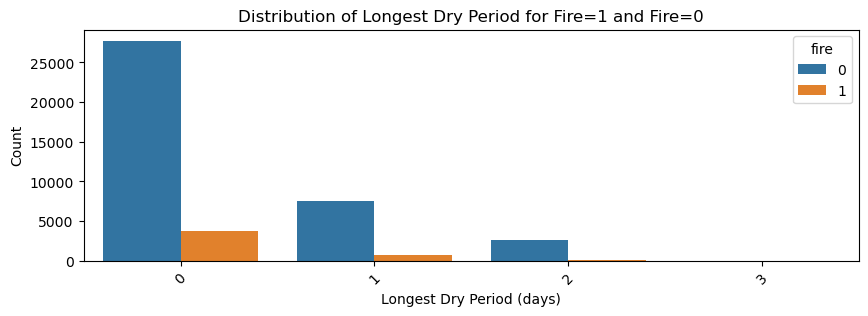

In [9]:
# fire distribution by longest_dry_period
plt.figure(figsize=(10,3))
sns.countplot(data=fire_cropped, x='longest_dry_period', hue='fire', order=fire_cropped['longest_dry_period'].value_counts().index)
plt.title('Distribution of Longest Dry Period for Fire=1 and Fire=0')
plt.xlabel('Longest Dry Period (days)')
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

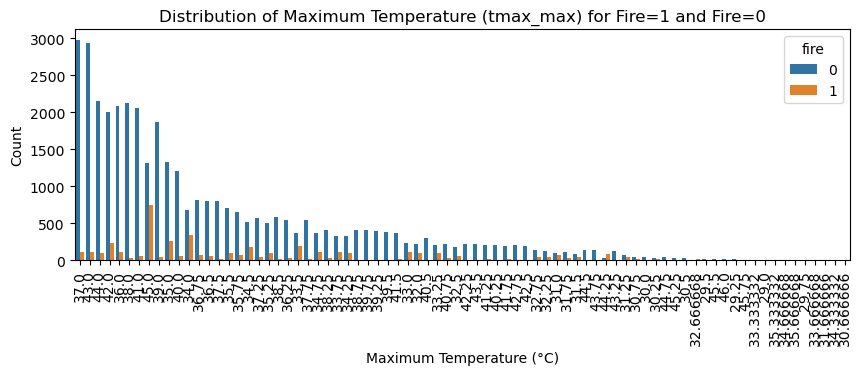

In [10]:
# fire distribution by tmax_max sorted by tmax_max value
plt.figure(figsize=(10,3))
sns.countplot(data=fire_cropped, x='tmax_max', hue='fire', order=fire_cropped['tmax_max'].value_counts().index)
plt.title('Distribution of Maximum Temperature (tmax_max) for Fire=1 and Fire=0')
plt.xlabel('Maximum Temperature (°C)')
# rotate x labels
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()